Ejemplo ePy_docs + ePy_units

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ePy_units.converter import UnitConverter
converter = UnitConverter("structural")

from ePy_docs.writers import DocumentWriter
writer = DocumentWriter("report", "minimal", language="es")

In [2]:
# Recargar módulos después de cambios en el código
import importlib
import sys

# Recargar todos los módulos de ePy_docs
modules_to_reload = [name for name in sys.modules.keys() if name.startswith('ePy_docs')]
for module_name in modules_to_reload:
    if module_name in sys.modules:
        importlib.reload(sys.modules[module_name])

print(f"Recargados {len(modules_to_reload)} módulos de ePy_docs")
print("🔧 Auto-width actualizado: 1 columna por defecto del layout actual")

Recargados 7 módulos de ePy_docs
🔧 Auto-width actualizado: 1 columna por defecto del layout actual


In [3]:
writer.add_h1("Conversor de tablas en formato dataframe")

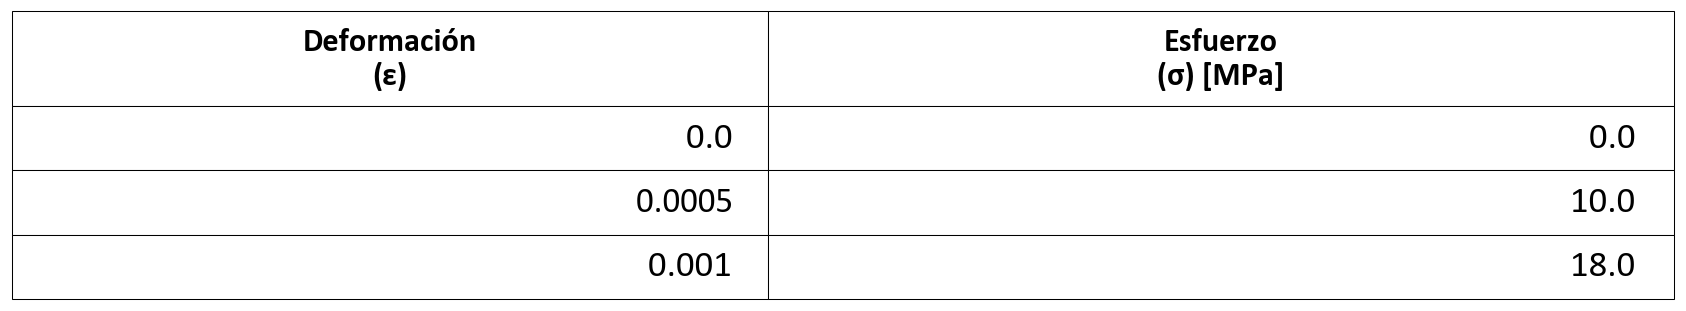

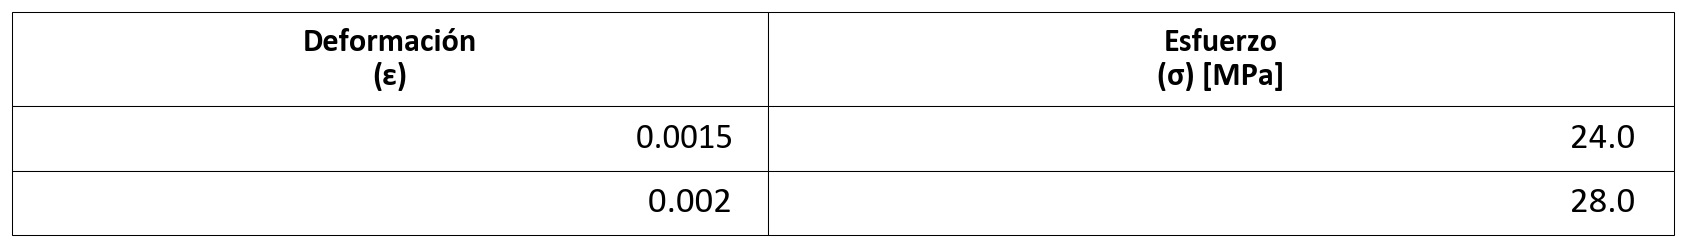

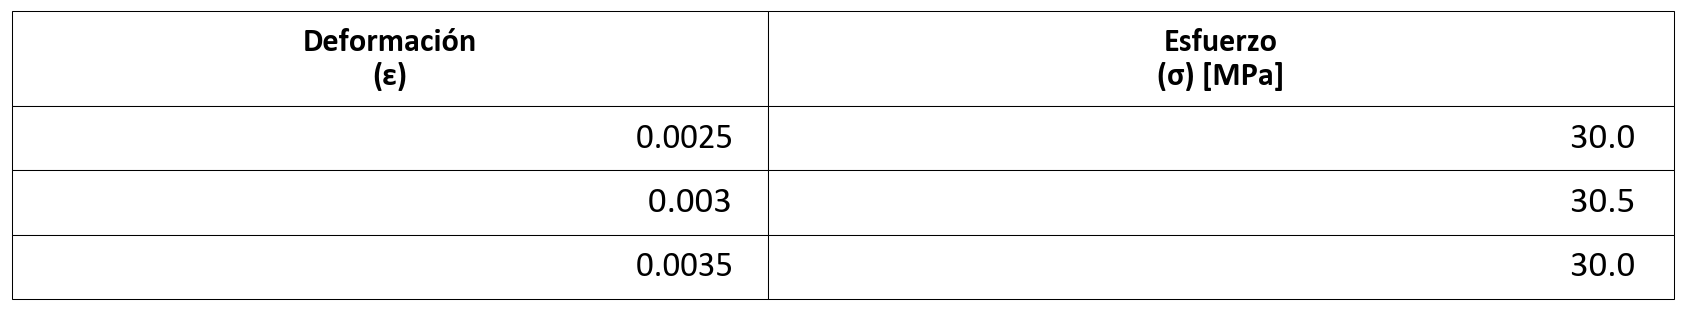

In [4]:
# Crear datos de diagrama esfuerzo-deformación
# Datos típicos de concreto en compresión
strain = np.array([0, 0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035])
stress = np.array([0, 10, 18, 24, 28, 30, 30.5, 30])  # MPa

df_stress_strain = pd.DataFrame({
    'Deformación (ε)': strain,
    'Esfuerzo (σ) [MPa]': stress
})

writer.add_table(df_stress_strain,title="Tabla original" , show_figure=True, max_rows_per_table = [3, 2, 25, 10])

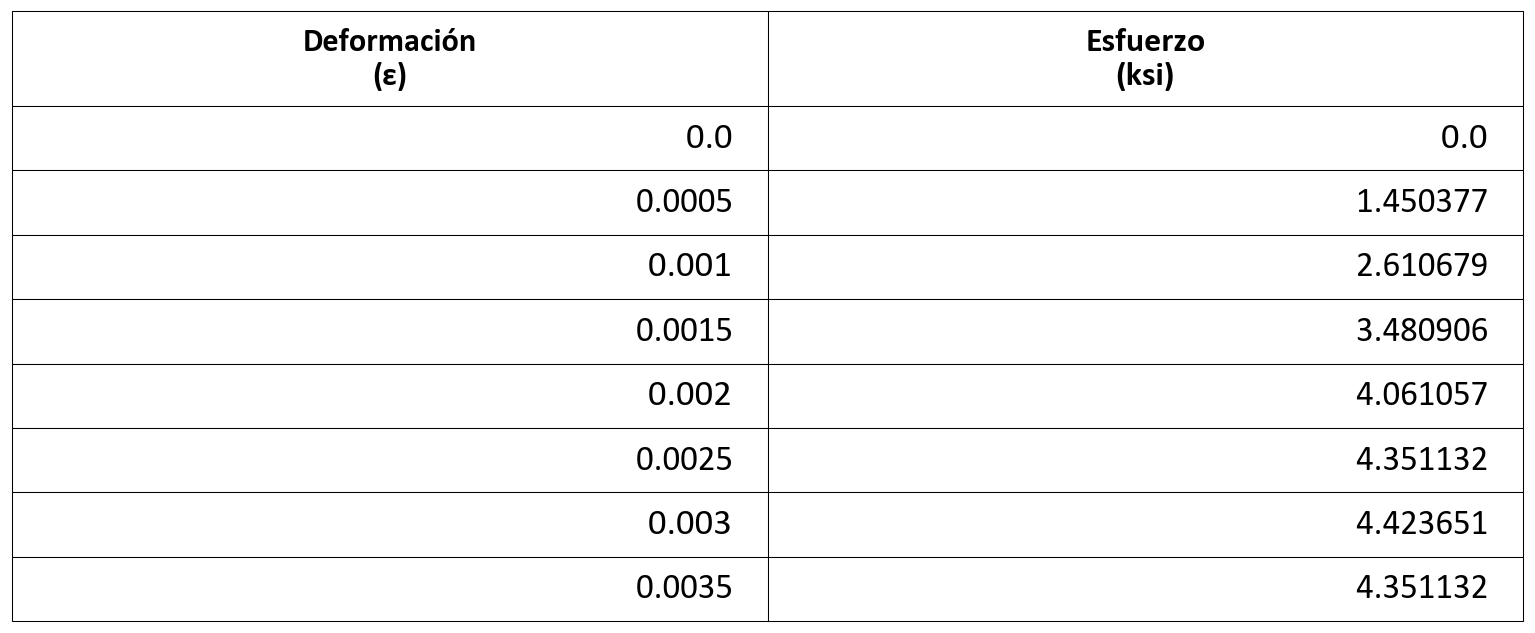

In [5]:
converted_df_stress_strain = converter.convert_table(df_stress_strain, target_system = "Imperial")
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a Imperial" , show_figure=True)

### Ejemplo: Selección de Paleta para Tablas Coloreadas

Puedes especificar qué paleta usar para el highlighting con `palette_name` (o `pallete_name`):
- Paletas disponibles: 'blues', 'reds', 'greens', 'oranges', 'purples', 'minimal', 'monochrome', etc.

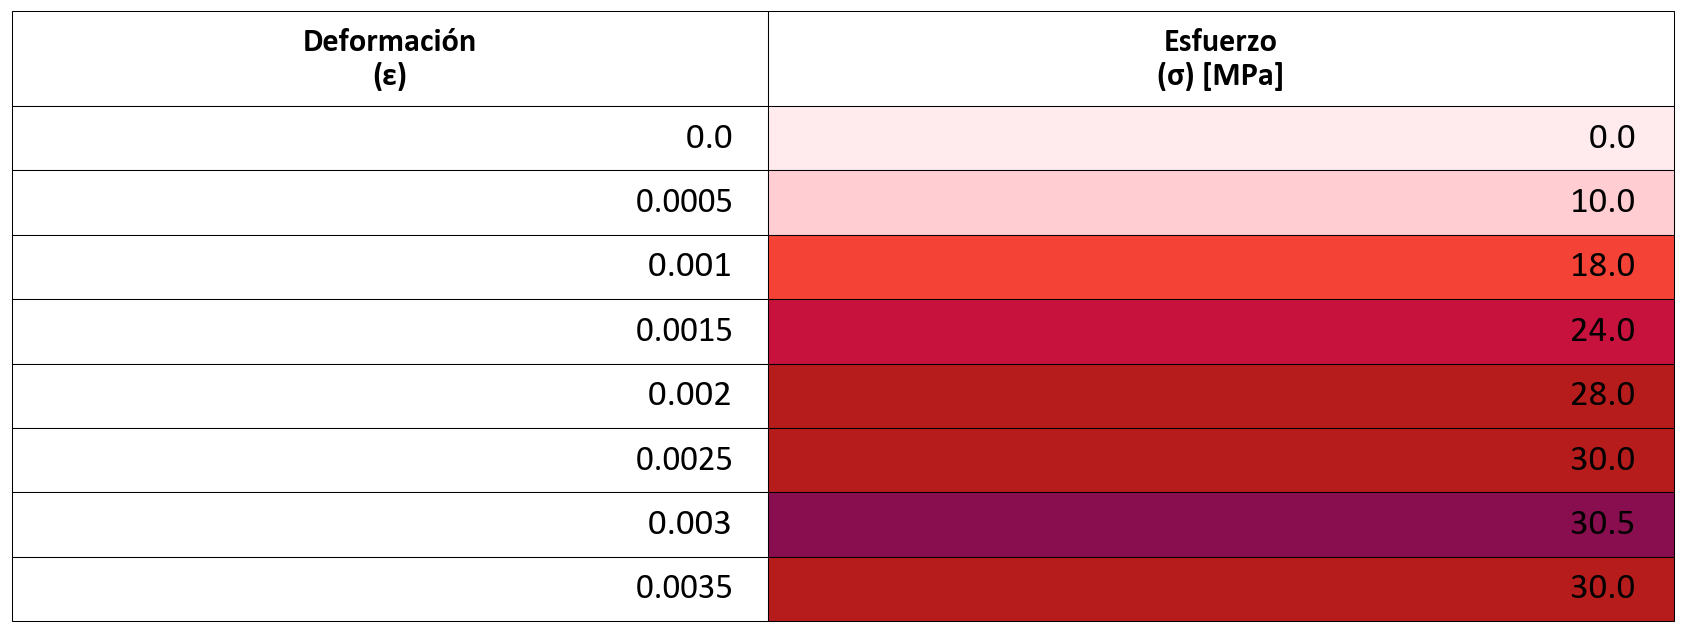

In [6]:
# Tabla con paleta 'reds' - resalta la columna "Esfuerzo (σ) [MPa]" en tonos rojos
writer.add_colored_table(
    df_stress_strain,
    title="Tabla con paleta 'reds' - Highlighting en columna de Esfuerzo",
    show_figure=True,
    palette_name='reds',  # También acepta 'pallete_name' (typo común)
    highlight_columns='Esfuerzo (σ) [MPa]'
)

### Ejemplo: Selección de Paleta para Plots

Los plots también pueden usar paletas específicas con el parámetro `palette_name`:

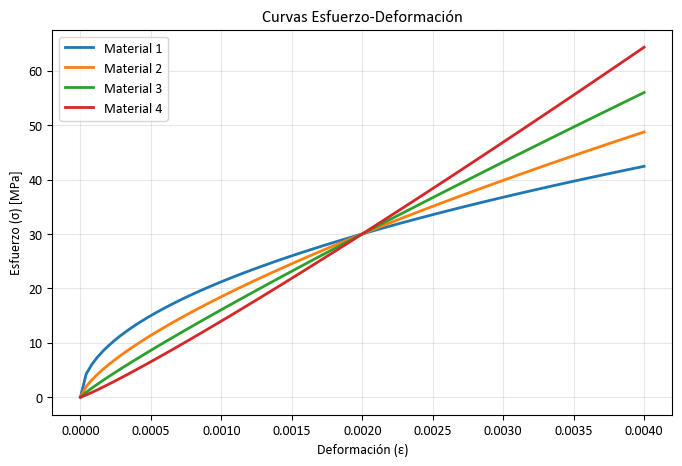

In [7]:
# Crear un gráfico de esfuerzo-deformación con paleta 'blues'
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar con múltiples series para mostrar el uso de la paleta
x = np.linspace(0, 0.004, 100)
for i in range(4):
    y = 30 * (x / 0.002) ** (0.5 + i * 0.2)
    ax.plot(x, y, label=f'Material {i+1}', linewidth=2)

ax.set_xlabel('Deformación (ε)')
ax.set_ylabel('Esfuerzo (σ) [MPa]')
ax.set_title('Curvas Esfuerzo-Deformación')
ax.legend()
ax.grid(True, alpha=0.3)

# Agregar el plot con paleta 'blues'
writer.add_plot(
    fig,
    title="Gráfico con paleta 'blues' - colores azules",
    palette_name='blues'  # Usa solo colores de la paleta 'blues'
)
plt.close(fig)

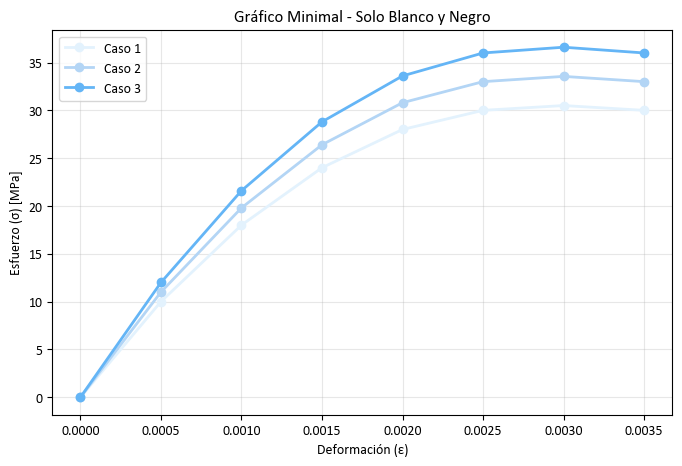

In [8]:
# Crear un gráfico con paleta 'minimal' (solo blanco y negro)
fig2, ax2 = plt.subplots(figsize=(8, 5))

# Múltiples series para mostrar cómo se usan los colores B&W
for i in range(3):
    y = stress * (1 + i * 0.1)
    ax2.plot(strain, y, label=f'Caso {i+1}', linewidth=2, marker='o')

ax2.set_xlabel('Deformación (ε)')
ax2.set_ylabel('Esfuerzo (σ) [MPa]')
ax2.set_title('Gráfico Minimal - Solo Blanco y Negro')
ax2.legend()
ax2.grid(True, alpha=0.3)

writer.add_plot(
    fig2,
    title="Gráfico con paleta 'minimal' - blanco y negro puro",
    palette_name='minimal'  # Solo usa blanco y negro
)
plt.close(fig2)

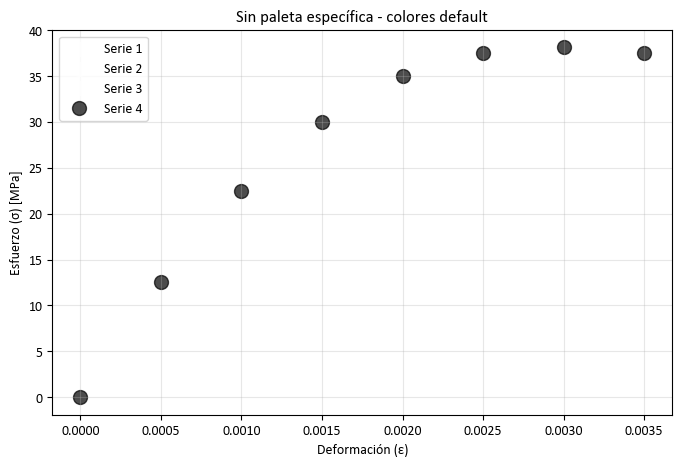

In [9]:
# Plot sin especificar paleta - usa colores default de matplotlib
fig3, ax3 = plt.subplots(figsize=(8, 5))

for i in range(4):
    y = stress * (0.8 + i * 0.15)
    ax3.scatter(strain, y, label=f'Serie {i+1}', s=100, alpha=0.7)

ax3.set_xlabel('Deformación (ε)')
ax3.set_ylabel('Esfuerzo (σ) [MPa]')
ax3.set_title('Sin paleta específica - colores default')
ax3.legend()
ax3.grid(True, alpha=0.3)

writer.add_plot(
    fig3,
    title="Gráfico sin paleta - usa colores default de matplotlib"
    # Sin palette_name: usa los colores por defecto de matplotlib
)
plt.close(fig3)

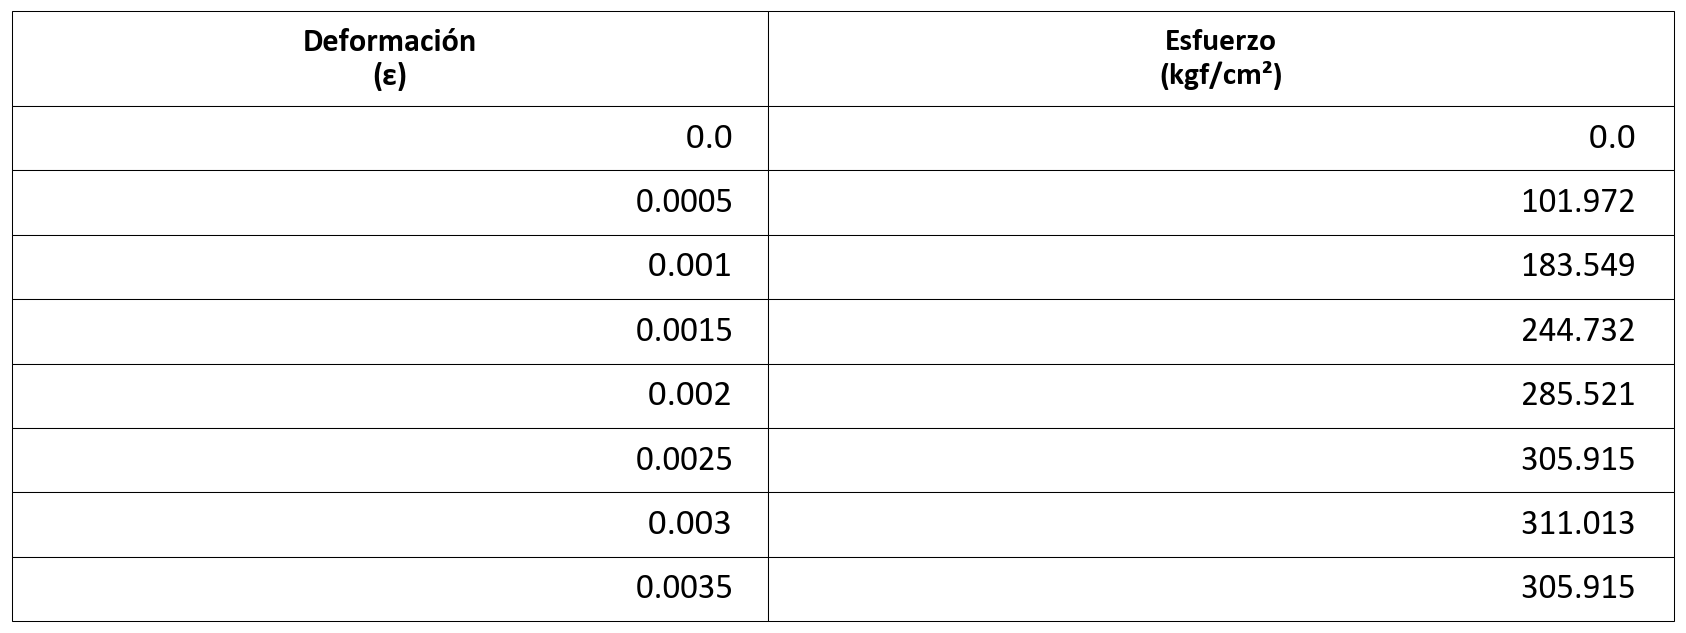

In [10]:
converted_df_stress_strain = converter.convert_table(df_stress_strain, target_system = "MKS")
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a MKS" , show_figure=True)

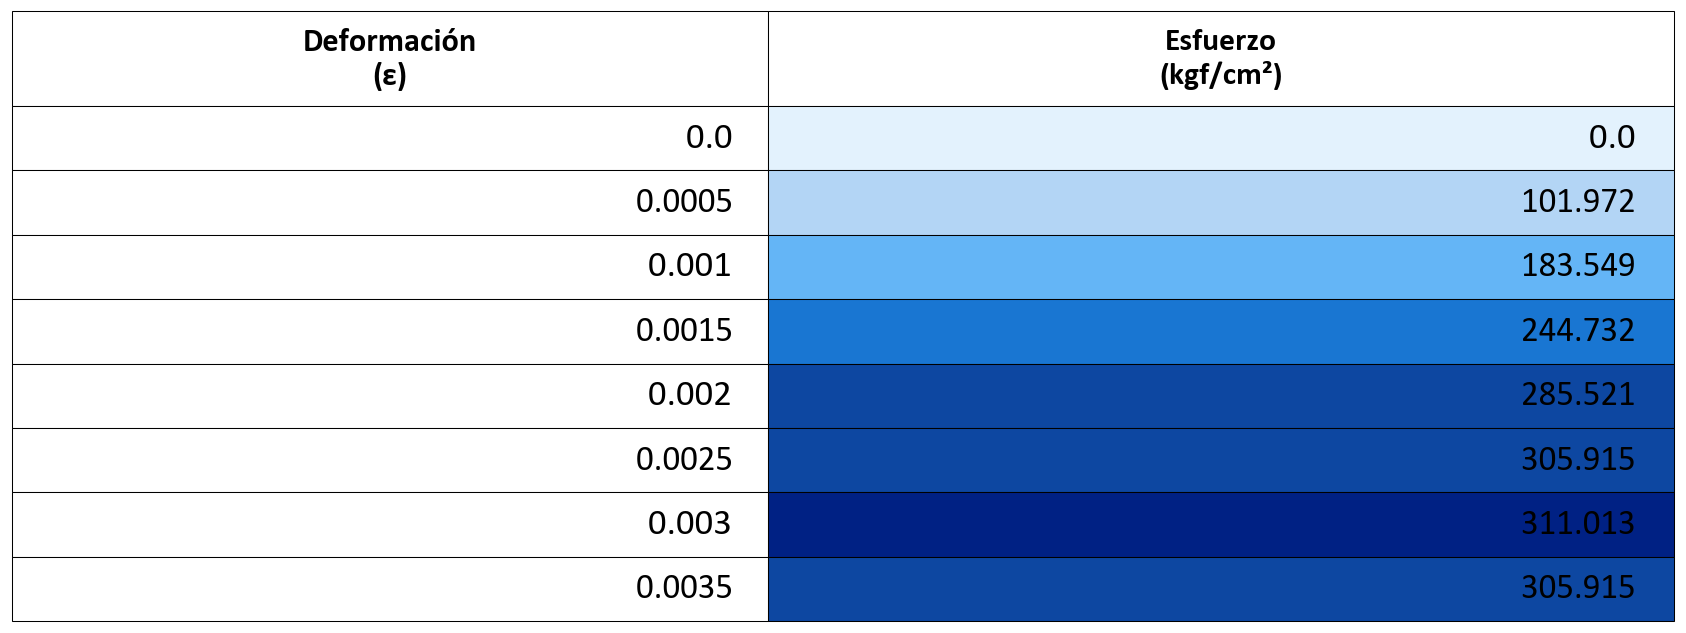

In [11]:
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a MKS" , show_figure=True, highlight_columns="Esfuerzo")

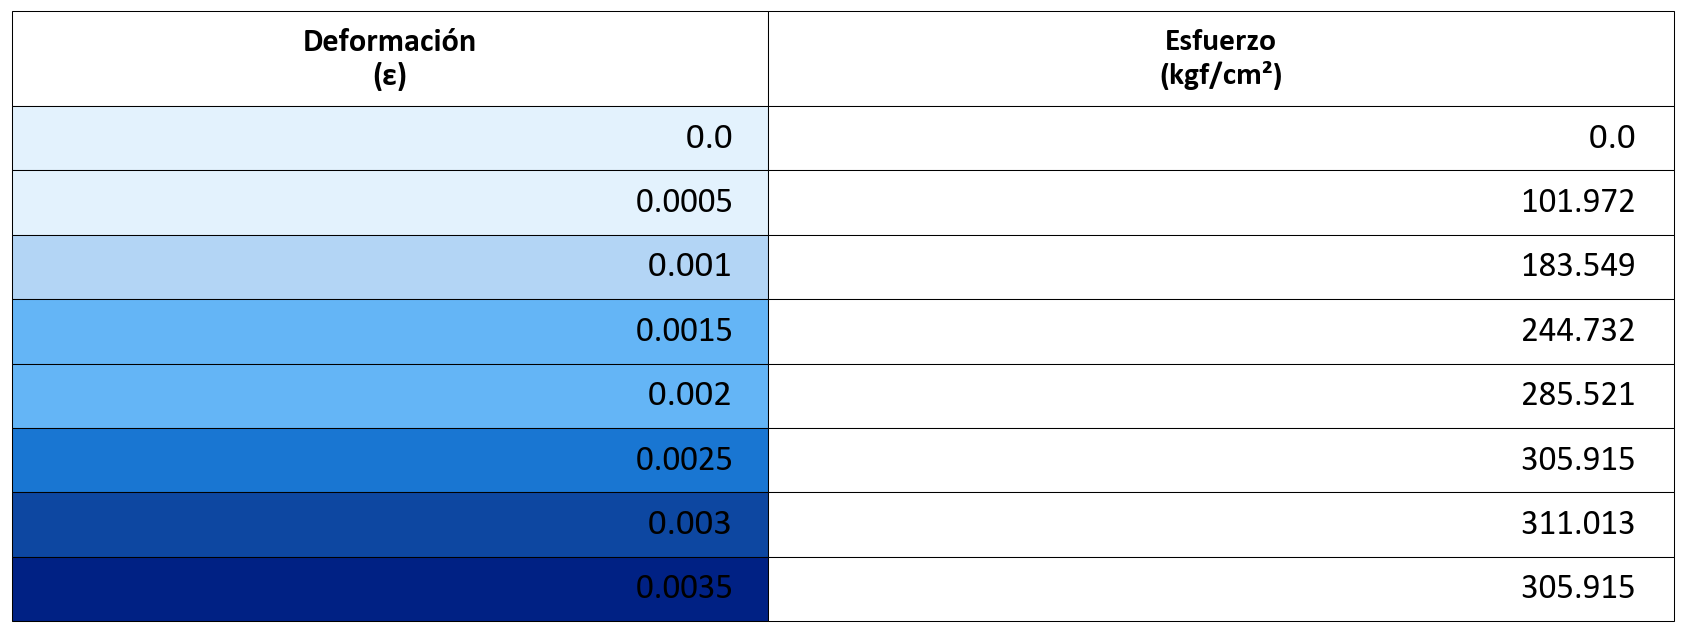

In [12]:
writer.add_colored_table(converted_df_stress_strain,title="Tabla convertida a MKS" , show_figure=True, highlight_columns="deformación")

In [13]:
writer.add_h1("Conversor directa de gráficos matplotlib")

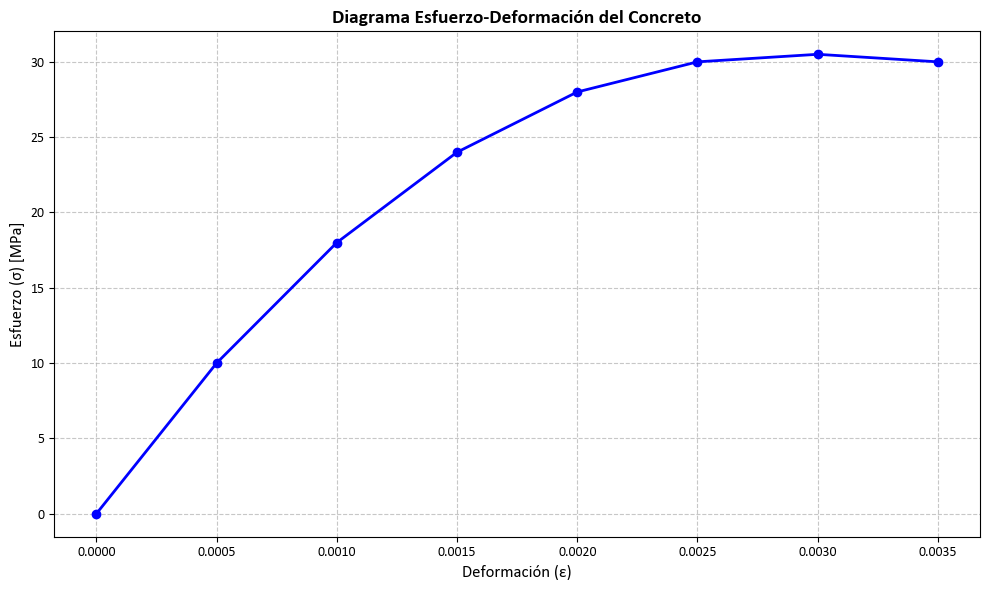

In [14]:
# Crear gráfico esfuerzo-deformación
fig = plt.figure(figsize=(10, 6))
plt.plot(df_stress_strain['Deformación (ε)'], df_stress_strain['Esfuerzo (σ) [MPa]'], 
         marker='o', linewidth=2, markersize=6, color='blue')
plt.xlabel('Deformación (ε)', fontsize=12)
plt.ylabel('Esfuerzo (σ) [MPa]', fontsize=12)
plt.title('Diagrama Esfuerzo-Deformación del Concreto', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

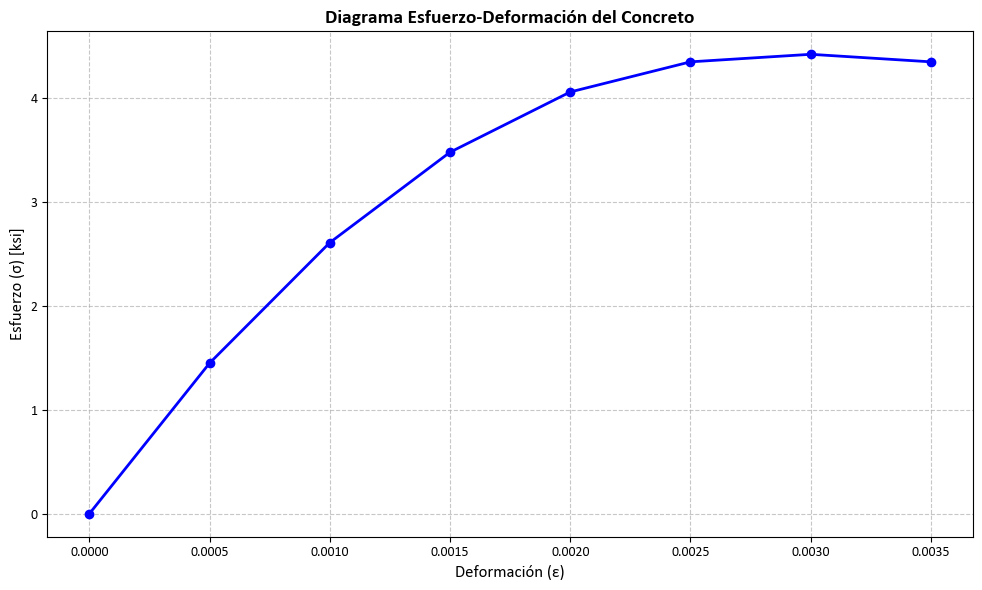

In [15]:
fig_converted_imperial = converter.convert_plot(fig, target_system = "Imperial", show_figure=False)
writer.add_plot(fig_converted_imperial)

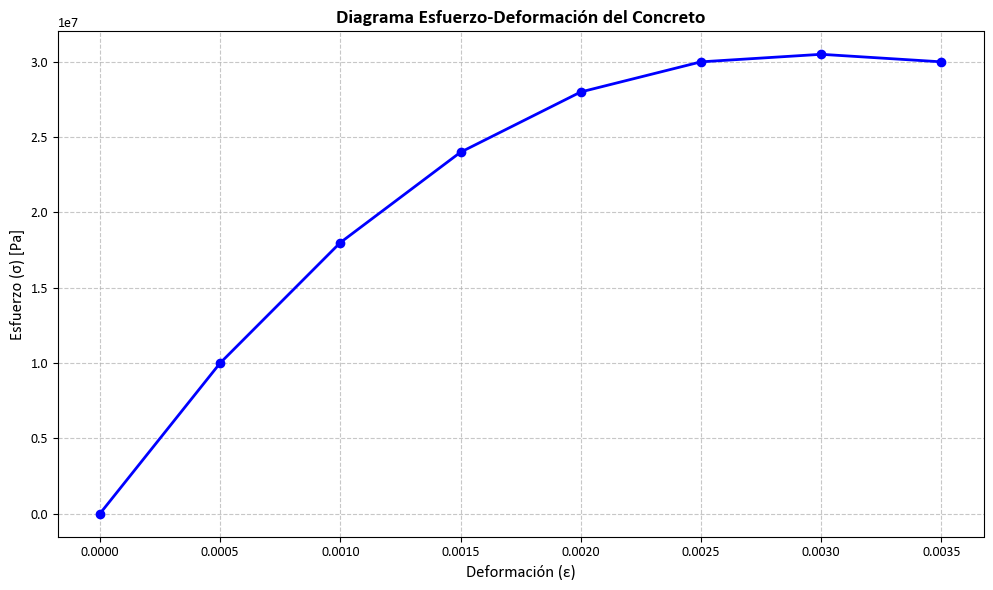

In [16]:
fig_converted_si = converter.convert_plot(fig, target_system = "SI", show_figure=False)
writer.add_plot(fig_converted_si)

In [17]:
# Crear índices jerárquicos
pisos = ['Piso 1', 'Piso 1', 'Piso 1', 'Piso 2', 'Piso 2', 'Piso 2', 'Piso 3', 'Piso 3', 'Piso 3']
elementos = ['Viga', 'Columna', 'Muro', 'Viga', 'Columna', 'Muro', 'Viga', 'Columna', 'Muro']

# Crear multi-índice
multi_index = pd.MultiIndex.from_arrays([pisos, elementos], names=['Piso', 'Elemento'])

# Datos estructurales
data = {
    'Momento [kN·m]': [150.5, 320.8, 80.2, 142.3, 298.5, 75.6, 128.9, 275.3, 70.1],
    'Cortante [kN]': [45.2, 125.6, 35.8, 42.1, 118.9, 33.4, 38.7, 112.2, 31.2],
    'Axial [kN]': [0, 850.4, 420.7, 0, 798.2, 394.3, 0, 745.8, 368.9],
    'Deflexión [mm]': [12.3, 8.5, 2.1, 15.7, 11.2, 2.8, 18.9, 13.8, 3.5]
}

# Crear DataFrame con multi-índice
df_multiindex = pd.DataFrame(data, index=multi_index)


In [18]:
converted_df_multiindex = converter.convert_table(df_multiindex)

In [19]:
converted_df_multiindex

Momento (kN·m)  Cortante (kN)  Axial (kN)  Deflexión (mm)
Piso   Elemento                                                           
Piso 1 Viga               150.5           45.2         0.0            12.3
       Columna            320.8          125.6       850.4             8.5
       Muro                80.2           35.8       420.7             2.1
Piso 2 Viga               142.3           42.1         0.0            15.7
       Columna            298.5          118.9       798.2            11.2
       Muro                75.6           33.4       394.3             2.8
Piso 3 Viga               128.9           38.7         0.0            18.9
       Columna            275.3          112.2       745.8            13.8
       Muro                70.1           31.2       368.9             3.5

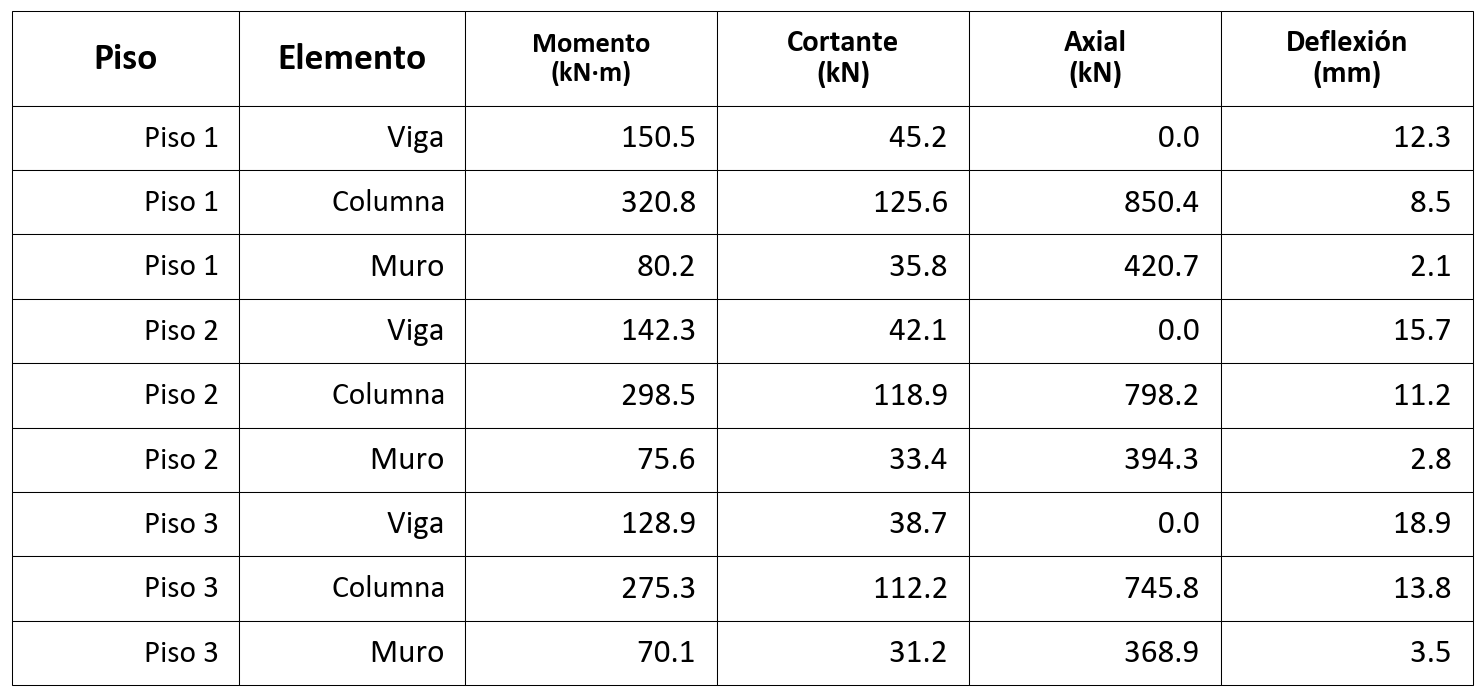

In [20]:

writer.add_table(converted_df_multiindex)

In [21]:
writer.generate(html=True, pdf=True)

{'qmd': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.qmd'),
 'pdf': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.pdf'),
 'html': WindowsPath('c:/Users/ingah/estructuraPy/ePy_docs/results/report/Document.html')}